# Testando as redes

Nesse caderno serão testadas as redes treinadas no segundo estágio, com imagens aindas não vistas (dados de teste)

In [1]:
from fastai.vision import *

## Carregando dados de teste

Abaixo carregaremos os dados para teste, para isso colocamos numa nova pasta chamada `v3-testset`, que contém pastas com dados para treinamento e validação, porém substituímos os dados de validação por imagens de teste.

In [18]:
# Copiar os modelos para a pasta onde as imagens estão carregadas, para que seja possível carregar o modelo
# Não conseguir fazer funcionar com os modelos em outra pasta
!cp -r ../models/ ../dataset/testset

In [4]:
pathToTest = Path('../dataset/testset/')

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(pathToTest, ds_tfms=get_transforms(),
                               size=224, num_workers=4,bs=12).normalize(imagenet_stats)
data.classes

['match', 'unmatch']

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['match', 'unmatch'], 2, 12, 12)

# Métricas para teste:

Para facilitar a visualização dos resultados, carregaremos os modelos com a métrica `accuracy`.

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.load('resnet34-stage-2');

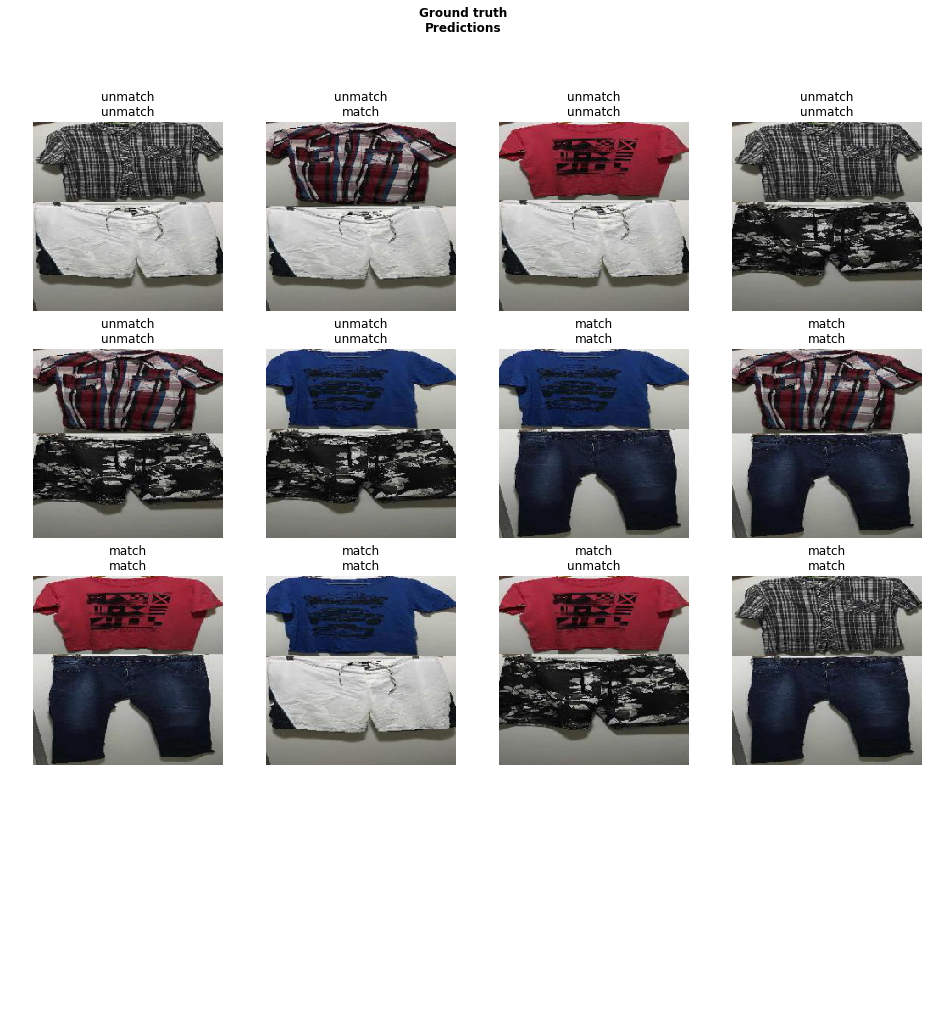

In [20]:
learn.show_results()

In [21]:
learn.validate()

[0.9007718, tensor(0.8333)]

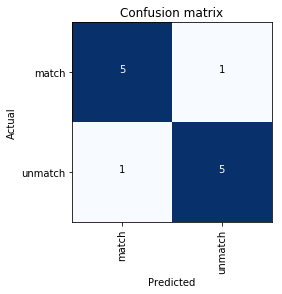

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Resultados para a ResNet50:

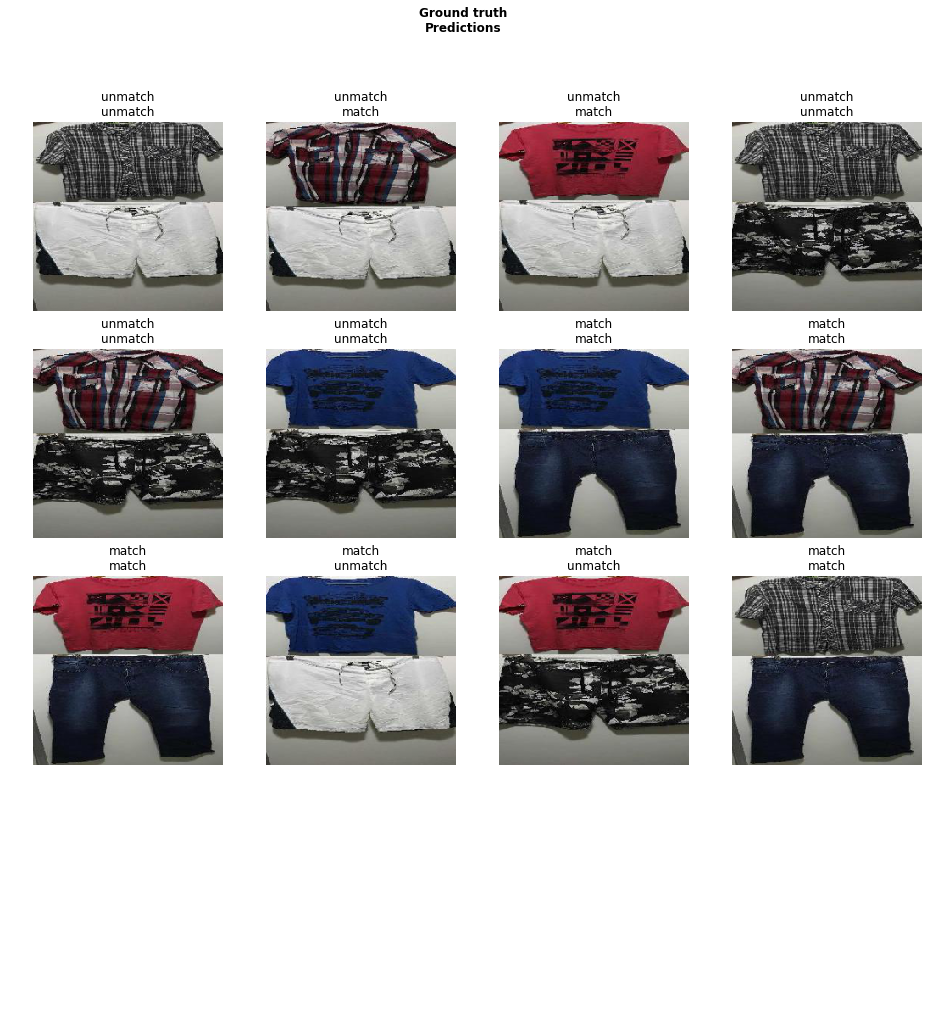

In [23]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.load('resnet50-stage-2');
learn.show_results()

In [24]:
learn.validate()

[0.9759739, tensor(0.6667)]

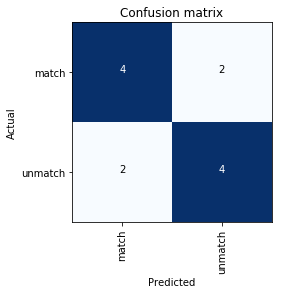

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Resultados Parciais:

Como podemos ver, nossa rede ResNet50 provavelmente teve um `overfit` e a ResNet34 obteve melhores resultados.

Vamos ver como se saí a ResNet50 no primeiro estágio:

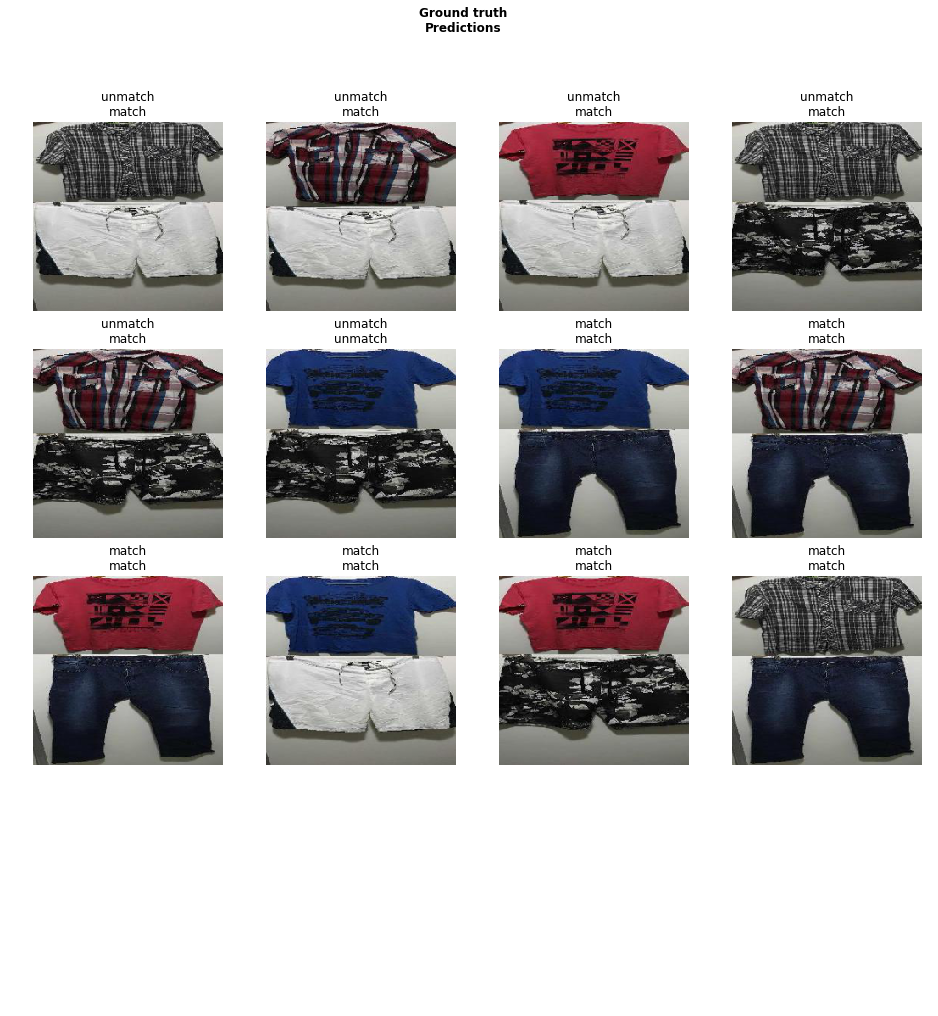

In [26]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.load('resnet50-stage-1');
learn.show_results()

In [27]:
learn.validate()

[0.99869937, tensor(0.5833)]

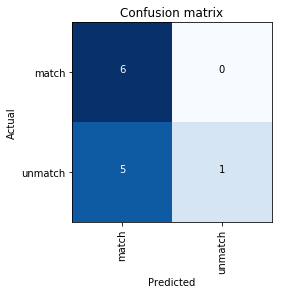

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Resultados até o momento:

Apesar de alterarmos pouco os hiper-parametros, é surpreendente observar que a ResNet50 obteve resultados piores que a ResNet34. Contudo, é interessante pensar que um modelo mais "leve" seja o melhor, visto que necessita menos recursos para o treinamento.

## Conclusões:
Nesses experimentos nós testamos dois modelos e os comparamos. Fora do escopo desses cadernos, também observamos a necessidade de tratar os dados, que no nosso caso foi redimensionar as imagens, para que não fossem cortadas indevidamente ao aplicar as transformações padrões, implicando na perda de informações e performance.

## Pesquisas futuras:
Nós esperamos treinar um modelo (UNET) para reconher roupas e extraí-las. Dessa forma será possível obter mais imagens para treinamento, obtendo assim modelos melhores e mais complexos.

Esperamos que isso vire um aplicativo e ajude pessoas que estejam em busca de dicas de moda :-)